In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('chipseq_expression_K562.txt')
d2 = df[["H3K27ac_signal","H3K4me3_signal"]]
target = df['expression']

<h4> Zadanie1: Uzupełnij definicję funkcji loss.

In [ ]:
def loss_function(w1, w2, w0, X, t):
    """
    tutaj zdefiniuj funkcję, która przyjmuje jako argument wagi
    (w1,w2,w0), dane w postaci listy list (X) oraz wartosci (t),
    a ktora zwraca wartosc funkcji kosztu.
    """
    X = np.array(X)
    t = np.array(t)
    
    y_pred = w1*X[:,0] + w2*X[:,1] + w0  #X[:,0] wszytskie rzędy pierwszej kolumny
    return np.mean((y_pred - t)**2)

In [16]:
#przykladowe wywolanie
loss_function(3, 8, -1, d2, target)

2396.2933715431755

In [17]:
#przykladowe wywolanie
loss_function(-0.5, 8, -23, d2, target) #lepiej

146.4180874045961

<h4> Zadanie2: Uzupełnij definicję funkcji update_weights.

In [18]:
def update_weights(w1, w2, w0, X, t, eta):
    """
    tutaj zdefiniuj funkcję, która przyjmuje jako argument wagi
    (w1,w2,w0), dane (X), wartosci (t) oraz wspolczynnik uczenia
    (eta), a ktora zwraca zaktualizowane wartosci w1, w2, w0
    """
    X = np.array(X)
    t = np.array(t)
    
    y_pred = w1*X[:,0] + w2*X[:,1] + w0  

    dw1 = (2/len(X)) * np.dot(y_pred - t, X[:,0])
    dw2 = (2/len(X)) * np.dot(y_pred - t, X[:,1])
    dw0 = (2/len(X)) * np.sum(y_pred - t)

    dw = np.array([dw1, dw2, dw0])

    weights = np.array([w1, w2, w0])
    weights = weights - eta * dw  

    return (weights[0], weights[1], weights[2])

In [19]:
#przykladowe wywolanie
print(update_weights(3, 8, -1, d2, target, 0.001))

(2.5079428044122563, 7.500080472785515, -1.0961084233983287)


Zadanie3: Celem jest zbudowanie modelu regresji liniowej przewidującego $target$ w oparciu o $d2$. Wystartuj z początkowych parametrów 1, 1 oraz 1. Przyjmując $\eta=0.001$ wykonaj 100 aktualizacji tych parametrów na podstawie metody spadku gradientu. Narysuj zależność funkcji kosztu od numeru iteracji. Wykonaj analogiczne obliczenia dla $\eta=0.01$ oraz $\eta=0.00001$. Możesz potestować też inne zestawy parametrów początkowych (np. -100, 100, -100). Skomentuj otrzymane wyniki.

In [64]:
def linear_regression(w1, w2, w0, X, t, eta, iterations):
    loss_list = []
    for i in range(iterations):
        (w1, w2, w0) = update_weights(w1, w2, w0, X, t, eta)
        loss = loss_function(w1, w2, w0, X, t)
        loss_list.append(loss)
        # if i % 10 == 0:
        #     print(f"Epoch {i+1}: Weights= ({w1}, {w2}, {w0}) | Loss= {loss}")
    plt.title(f'Loss function for eta={eta}')
    plt.scatter(range(iterations),loss_list)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.text(0.85, 0.75, f"Final loss: {loss_list[-1]:.2f}", transform=plt.gca().transAxes, ha='right')
    plt.show()

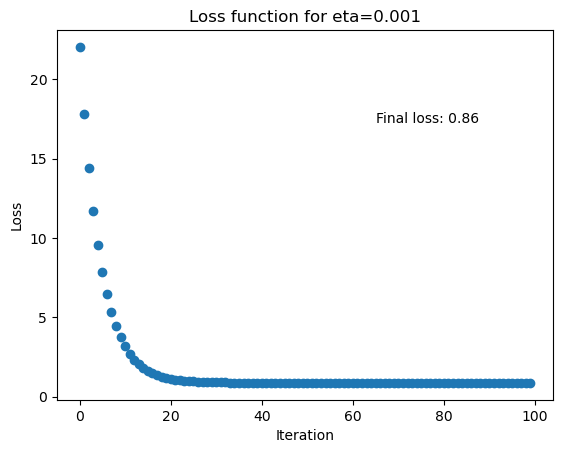

In [ ]:
linear_regression(1, 1, 1, d2, target, 0.001, 100)

#Szybki spadek do 20 itearacji, potem można przerwać - stabilizacja. Eta ok.

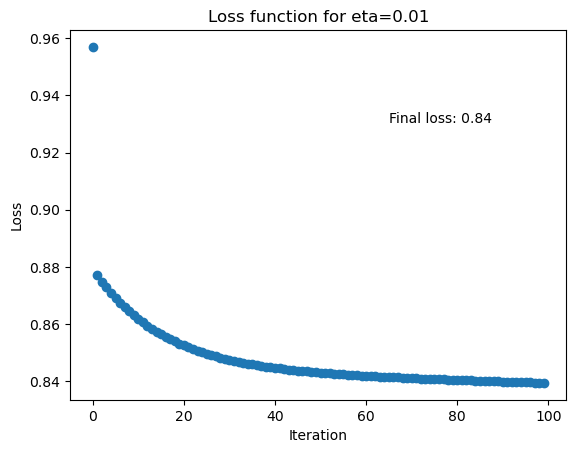

In [67]:
linear_regression(1, 1, 1, d2, target, 0.01, 100)
#Bardzo szybki przeskok z 1 do drugiej iteracji, potem stabliny spadek, 
#Końcowo wartośc loss była  minimalnie mniejsza, ale spadek był mniej stabilny.

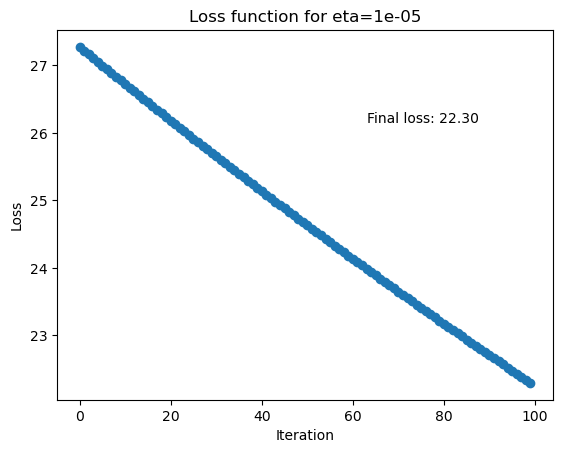

In [68]:
linear_regression(1, 1, 1, d2, target, 0.00001, 100)

#Stabliny spadek, ale końcowy loss bardzo duży; parametr eta za mały aby efektywnie uczyć model.

<h4> Zadanie4: Zazwyczaj nie wiemy z góry ile razy należy zmodyfikować wagi - kiedy dalsza aktualizacja nie przynosi efektu. Jednym z rozwiązań tego problemu jest sprawdzenie o jaki procent zmieniają sie aktualne wagi. Przyjmijmy, że jeżeli zmiana funkcji kosztu jest mniejsza niż 0,1% to przerywamy działanie. Ile kroków należałoby wykonać aby zrealizować poprzednie zadanie (dla wybranego zestawu pozostałych hiperparametrów)?

In [ ]:
def linear_regression_with_stop(w1, w2, w0, X, t, eta, n, stop_criteria=0.01):
    loss_list = []
    for i in range(n):
        (w1, w2, w0) = update_weights(w1, w2, w0, X, t, eta)
        loss = loss_function(w1, w2, w0, X, t)
        loss_list.append(loss)

        if i > 1:
            if abs((loss_list[-1] - loss_list[-2])/loss_list[-2]) < stop_criteria:
                print(f"Training stopped at iteration {i+1}.")
                break
    print(f'Final loss for eta {eta}: {loss_list[-1]:.2f}\n')
    print(f'Weights for eta {eta}: w1={w1:.2f}, w2={w2:.2f}, w0={w0:.2f}')

In [106]:
linear_regression_with_stop(1, 1, 1, d2, target, 0.001, 100)

Training stopped at iteration 30.
Final loss: 0.91
Weights for eta 0.001: w1=0.51, w2=0.54, w0=0.91


In [107]:
linear_regression_with_stop(1, 1, 1, d2, target, 0.01, 100)

Training stopped at iteration 3.
Final loss: 0.87
Weights for eta 0.01: w1=0.49, w2=0.52, w0=0.90


In [108]:
linear_regression_with_stop(1, 1, 1, d2, target, 0.00001, 100)

Training stopped at iteration 3.
Final loss: 27.16
Weights for eta 1e-05: w1=1.00, w2=1.00, w0=1.00


<h4> Zadanie5: Porównaj te parametry z otrzymanymi z Zadania3. Skomentuj otrzymane wyniki.

In [99]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(d2, target)

LinearRegression()

In [ ]:
model.coef_ #wspolczynnki dla zmiennych

array([0.48164297, 0.74793775])

In [102]:
model.intercept_ #wyraz wolny

-0.23377574137486512

In [ ]:
#Weights for eta 0.001: w1=0.51, w2=0.54, w0=0.91
#Weights for eta 0.01: w1=0.49, w2=0.52, w0=0.90
#Weights for eta 1e-05: w1=1.00, w2=1.00, w0=1.00

#Stworzone przeze mnie modele o eta 0.01 i 0.001 są najbardziej zbliżone do modelu z sklearn. 
#Jedyna znacząca różnica to waga inteceptu, co jest zadowalającym wynikiem.
#Model eta 1e-05 nic sie nie nauczył, bo eta była za mała.

Zadanie6: Rozważ jeszcze raz dane $d2/target$.
    
- Podziel je na trzy podzbiory - treningowy (60%), walidacyjny (20%) oraz testowy (20%); najlepiej przez odpowiednią funkcję.
- Przetestuj różne wartości parametrów $\eta$ na zbiorze walidacyjnym, na tej podstawie wybierz jeden, który użyjesz do wytrenowania parametrów modelu na zbiórze treningowym.
- Na końcu wyznacz wartość funkcji kosztu na zbiorze testowym. Skomentuj otrzymane wyniki.

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_temp, t_train, t_temp = train_test_split(
    d2, target, test_size=0.4, random_state=42
)
X_test, X_val, t_test, t_val = train_test_split(
    X_temp, t_temp, test_size=0.5, random_state=42
)

def linear_regression_with_stop2(w1, w2, w0, X, t, eta, n, stop_criteria=0.001, graph=True):
    loss_list = []
    for i in range(n):
        (w1, w2, w0) = update_weights(w1, w2, w0, X, t, eta)
        loss = loss_function(w1, w2, w0, X, t)
        loss_list.append(loss)

        if i > 1:
            if abs((loss_list[-1] - loss_list[-2])/loss_list[-2]) < stop_criteria:
                final_it = i+1
                break
        else: 
            final_it = n
    if graph:
        plt.title(f'Loss function for eta={eta}')
        plt.scatter(range(final_it),loss_list)
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.text(0.85, 0.75, f"Final loss: {loss_list[-1]:.2f}", transform=plt.gca().transAxes, ha='right')
        plt.show()
    else:
        print(f'Final loss {loss_list[-1]:.2f}\n')

        return (w1, w2, w0)

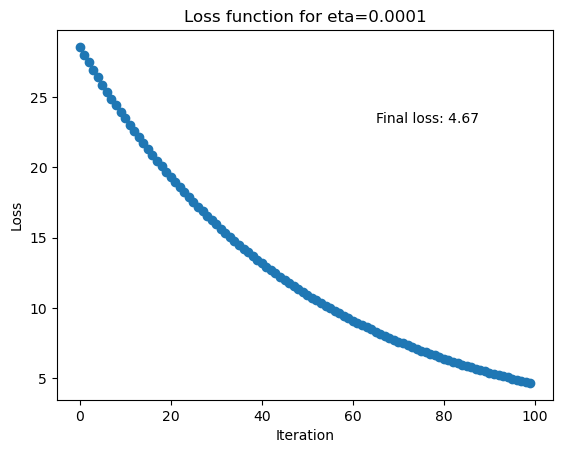

In [143]:
linear_regression_with_stop2(1, 1, 1, X_val, t_val, 0.0001, 100)

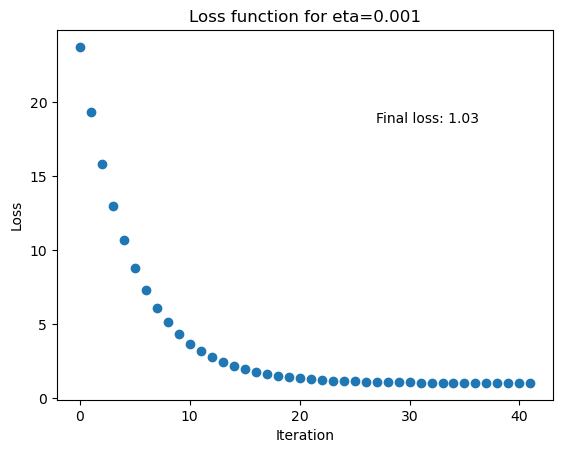

In [144]:
linear_regression_with_stop2(1, 1, 1, X_val, t_val, 0.001, 100)

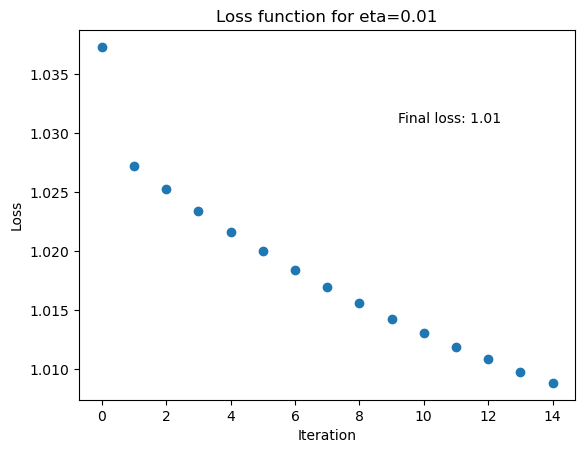

In [140]:
linear_regression_with_stop2(1, 1, 1, X_val, t_val, 0.01, 100)

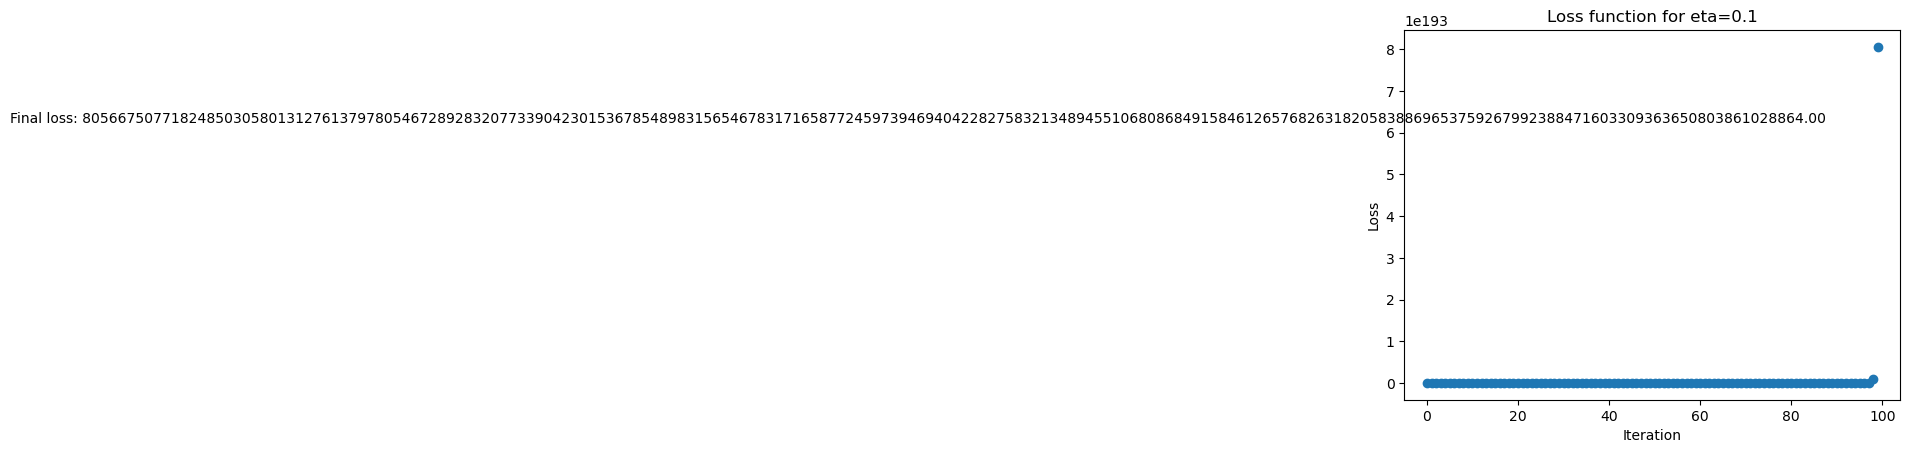

In [ ]:
linear_regression_with_stop2(1, 1, 1, X_val, t_val, 0.1, 100)
#lol

In [ ]:
#Najlepsza loss jest dla eta 0.01, ale róznica jest minimalna w porównaniu do eta 0.001, 
#gdzie funckja straty zachowuje się bardziej stabilnie. Wybieram eta 0.001
linear_regression_with_stop2(1, 1, 1, X_val, t_val, 0.001, 100, graph = False)
linear_regression_with_stop2(1, -1, 0, X_val, t_val, 0.001, 100, graph = False)
linear_regression_with_stop2(1, 1, 0, X_val, t_val, 0.001, 100, graph = False)

#wybrane parametry (1,1,0), obniżyłam też stop_criteria do 0.001

Final loss 1.03

Final loss 3.07

Final loss 1.00



(0.5626525706914148, 0.5988118420220874, -0.08159926358748845)

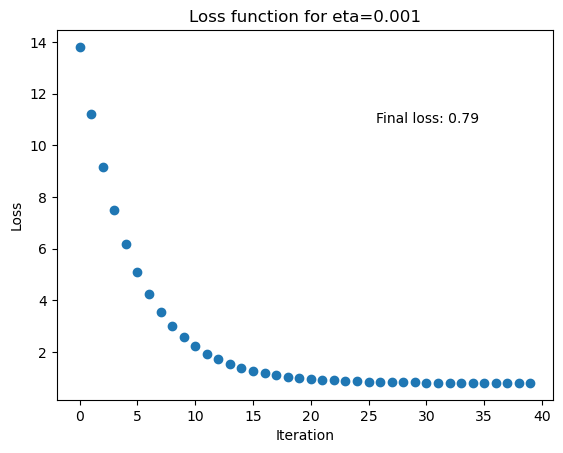

In [ ]:
linear_regression_with_stop2(1, 1, 0, X_train, t_train, 0.001, 100)

# Na treningowym zbiorze loss jest niższy niż na walidacyjnym, co jest dobrym znakiem. 
# Wybór parametrów i hiperparametrów jest zadowający co widac po wartościach loss.